# Intro

Here's a simple example where we produce a set of plots, called a tear sheet, for a single stock.

You may have to import yfinance first by running:
`pip install yfinance`

## Imports and Settings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import yfinance as yf
import pyfolio as pf
%matplotlib inline

/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


## Download daily stock prices using yfinance

Pyfolio expects tz-aware input set to UTC timezone.

In [7]:
fb = yf.Ticker('META')
history = fb.history(period='max')
history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-05-18 00:00:00-04:00,41.923775,44.864921,37.885933,38.115242,573576400,0.0,0.0
2012-05-21 00:00:00-04:00,36.420340,36.549951,32.900938,33.927845,168192700,0.0,0.0
2012-05-22 00:00:00-04:00,32.512110,33.489168,30.847123,30.906942,101786600,0.0,0.0
2012-05-23 00:00:00-04:00,31.275832,32.402439,31.265862,31.903940,73600000,0.0,0.0
2012-05-24 00:00:00-04:00,32.851089,33.110307,31.674631,32.930847,50237200,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-21 00:00:00-05:00,569.520020,570.000000,549.049988,563.090027,11154700,0.0,0.0
2024-11-22 00:00:00-05:00,563.549988,563.830017,554.590027,559.140015,9164000,0.0,0.0
2024-11-25 00:00:00-05:00,562.099976,572.590027,556.390015,565.109985,13599800,0.0,0.0


In [10]:
history.index = history.index.tz_convert('UTC')
history.index

DatetimeIndex(['2012-05-18 04:00:00+00:00', '2012-05-21 04:00:00+00:00',
               '2012-05-22 04:00:00+00:00', '2012-05-23 04:00:00+00:00',
               '2012-05-24 04:00:00+00:00', '2012-05-25 04:00:00+00:00',
               '2012-05-29 04:00:00+00:00', '2012-05-30 04:00:00+00:00',
               '2012-05-31 04:00:00+00:00', '2012-06-01 04:00:00+00:00',
               ...
               '2024-11-14 05:00:00+00:00', '2024-11-15 05:00:00+00:00',
               '2024-11-18 05:00:00+00:00', '2024-11-19 05:00:00+00:00',
               '2024-11-20 05:00:00+00:00', '2024-11-21 05:00:00+00:00',
               '2024-11-22 05:00:00+00:00', '2024-11-25 05:00:00+00:00',
               '2024-11-26 05:00:00+00:00', '2024-11-27 05:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3153, freq=None)

In [11]:
history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3153 entries, 2012-05-18 04:00:00+00:00 to 2024-11-27 05:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3153 non-null   float64
 1   High          3153 non-null   float64
 2   Low           3153 non-null   float64
 3   Close         3153 non-null   float64
 4   Volume        3153 non-null   int64  
 5   Dividends     3153 non-null   float64
 6   Stock Splits  3153 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 197.1 KB


In [12]:
returns = history.Close.pct_change()
returns

Date
2012-05-18 04:00:00+00:00         NaN
2012-05-21 04:00:00+00:00   -0.109861
2012-05-22 04:00:00+00:00   -0.089039
2012-05-23 04:00:00+00:00    0.032258
2012-05-24 04:00:00+00:00    0.032187
                               ...   
2024-11-21 05:00:00+00:00   -0.004297
2024-11-22 05:00:00+00:00   -0.007015
2024-11-25 05:00:00+00:00    0.010677
2024-11-26 05:00:00+00:00    0.014917
2024-11-27 05:00:00+00:00   -0.007567
Name: Close, Length: 3153, dtype: float64

## Create returns tear sheet
This will show charts and analysis about returns of the single stock.

/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24.723%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.192%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"
/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRL

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,76.74,2021-09-07,2022-11-03,2024-01-19,619
1,53.62,2012-05-18,2012-09-04,2013-08-05,317
2,42.96,2018-07-25,2018-12-24,2020-01-09,382
3,34.59,2020-01-29,2020-03-16,2020-05-20,80
4,22.06,2014-03-10,2014-04-28,2014-07-24,99


/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-packages/pyfolio/plotting.py:850: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_value=is_cum_returns[-1],
/Users/zhengshuang/Documents/ProgramingGuide/SourceCode/GithubRepo/everyfine/FinRLLearn/PyfolioExample/.venv/lib/python3.10/site-package

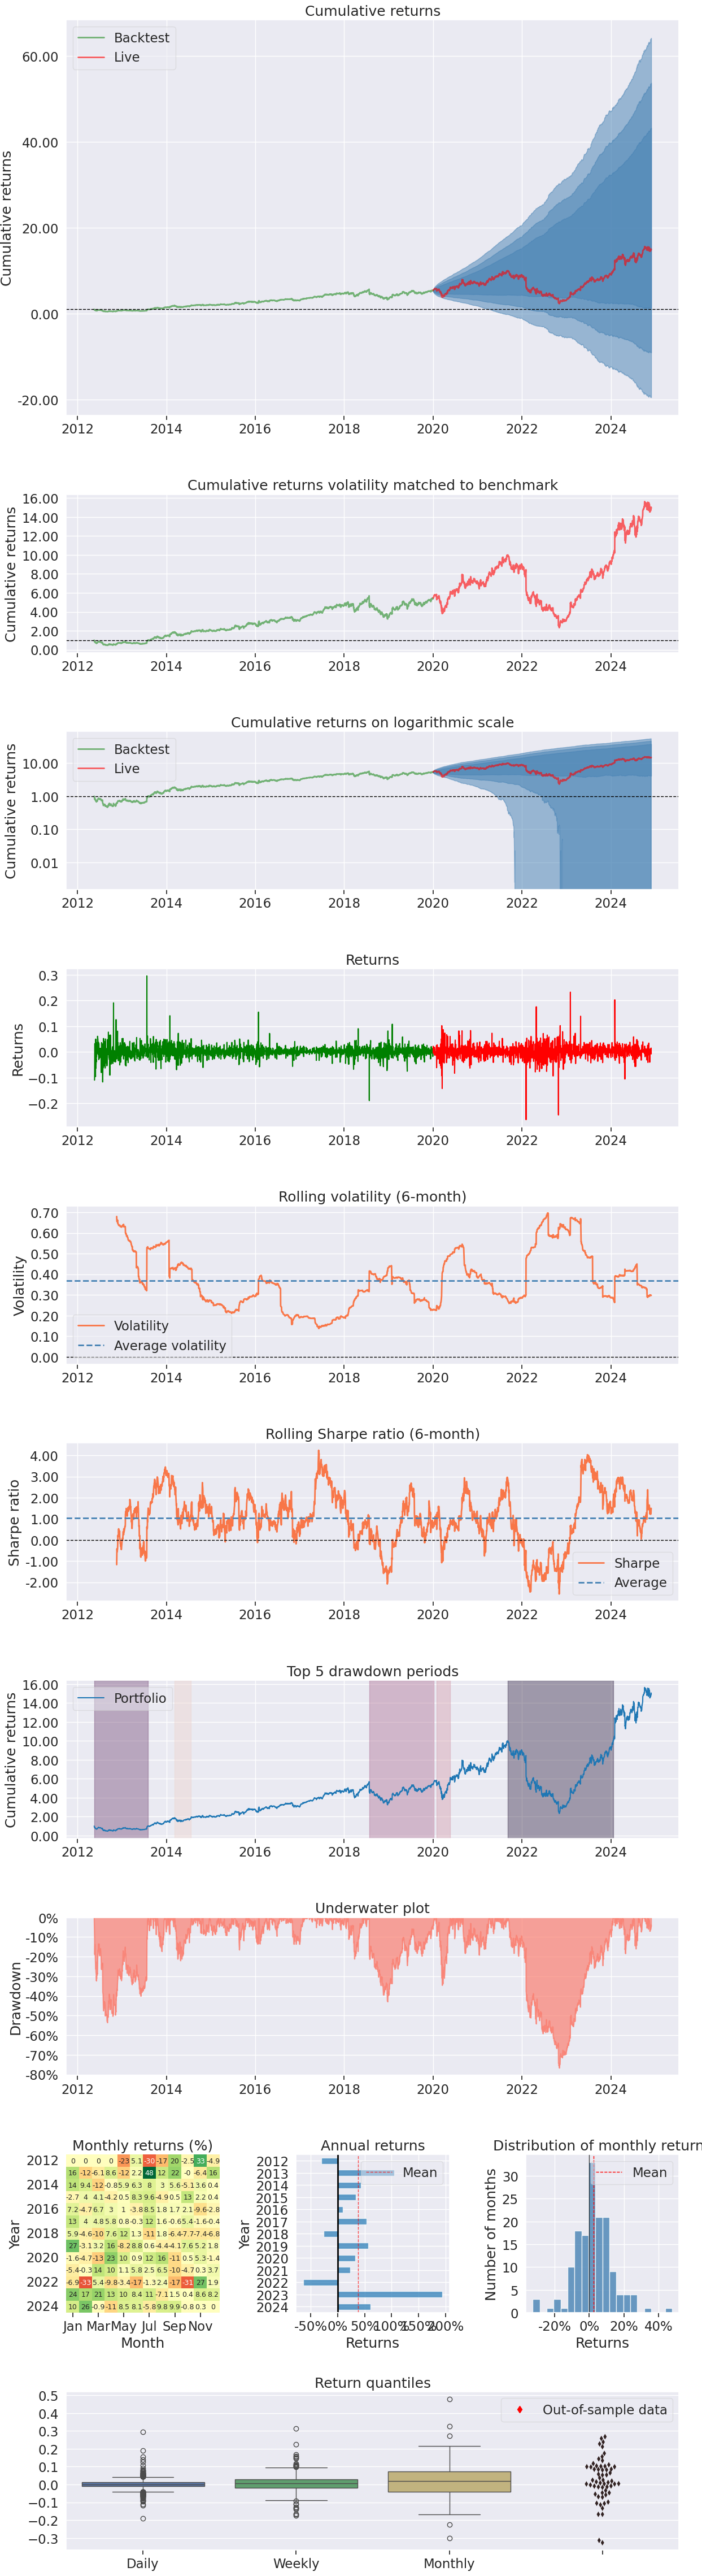

In [13]:
pf.create_returns_tear_sheet(returns, live_start_date='2020-1-1')